<a href="https://colab.research.google.com/github/hnfksdjjn/prevendo-valores-futuros/blob/main/modelo%20de%20previsao%20de%20arrecada%C3%A7ao%20de%20empresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dados = pd.read_excel("PlanejadoxRealizado2.xlsx")
dados

,Mês,Centro de Custos,Planejado,Realizado
0,2018-01-01,Prêsidencia,35224.760,33132.20
1,2018-01-01,Diretoria,29674.635,28050.65
2,2018-01-01,Comercial,25110.540,24341.85
3,2018-01-01,Contabilidade,37554.975,34807.05
4,2018-01-01,Financeiro,23318.880,21933.60
...,...,...,...,...
91,2018-12-01,Contabilidade,35972.340,33503.65
92,2018-12-01,Financeiro,32339.100,30119.75
93,2018-12-01,Recurso Humanos,37495.240,35267.80
94,2018-12-01,Produção,28676.670,27107.30


In [ ]:
dados.describe()

,Mês,Planejado,Realizado
count,96,96.000000,96.000000
mean,2018-06-16 12:00:00,30600.317969,28850.282812
min,2018-01-01 00:00:00,20545.470000,19638.400000
25%,2018-03-24 06:00:00,25029.905000,23681.125000
50%,2018-06-16 00:00:00,30270.335000,28569.350000
75%,2018-09-08 12:00:00,36220.165000,33926.162500
max,2018-12-01 00:00:00,40985.650000,37986.700000
std,NaN,6127.082069,5756.366625


In [ ]:
planejamento = dados['Planejado'].sum()
arrecadado = dados['Realizado'].sum()
total = arrecadado - planejamento
print("planejamento total:",planejamento)
print("arrecadaçao total: ", arrecadado)
print("total: ", total)

planejamento total: 2937630.525
arrecadaçao total:  2769627.15
total:  -168003.375


In [ ]:
dados['Mês'] = pd.to_datetime(dados['Mês']).dt.strftime('%B')
dados

,Mês,Centro de Custos,Planejado,Realizado
0,January,Prêsidencia,35224.760,33132.20
1,January,Diretoria,29674.635,28050.65
2,January,Comercial,25110.540,24341.85
3,January,Contabilidade,37554.975,34807.05
4,January,Financeiro,23318.880,21933.60
...,...,...,...,...
91,December,Contabilidade,35972.340,33503.65
92,December,Financeiro,32339.100,30119.75
93,December,Recurso Humanos,37495.240,35267.80
94,December,Produção,28676.670,27107.30


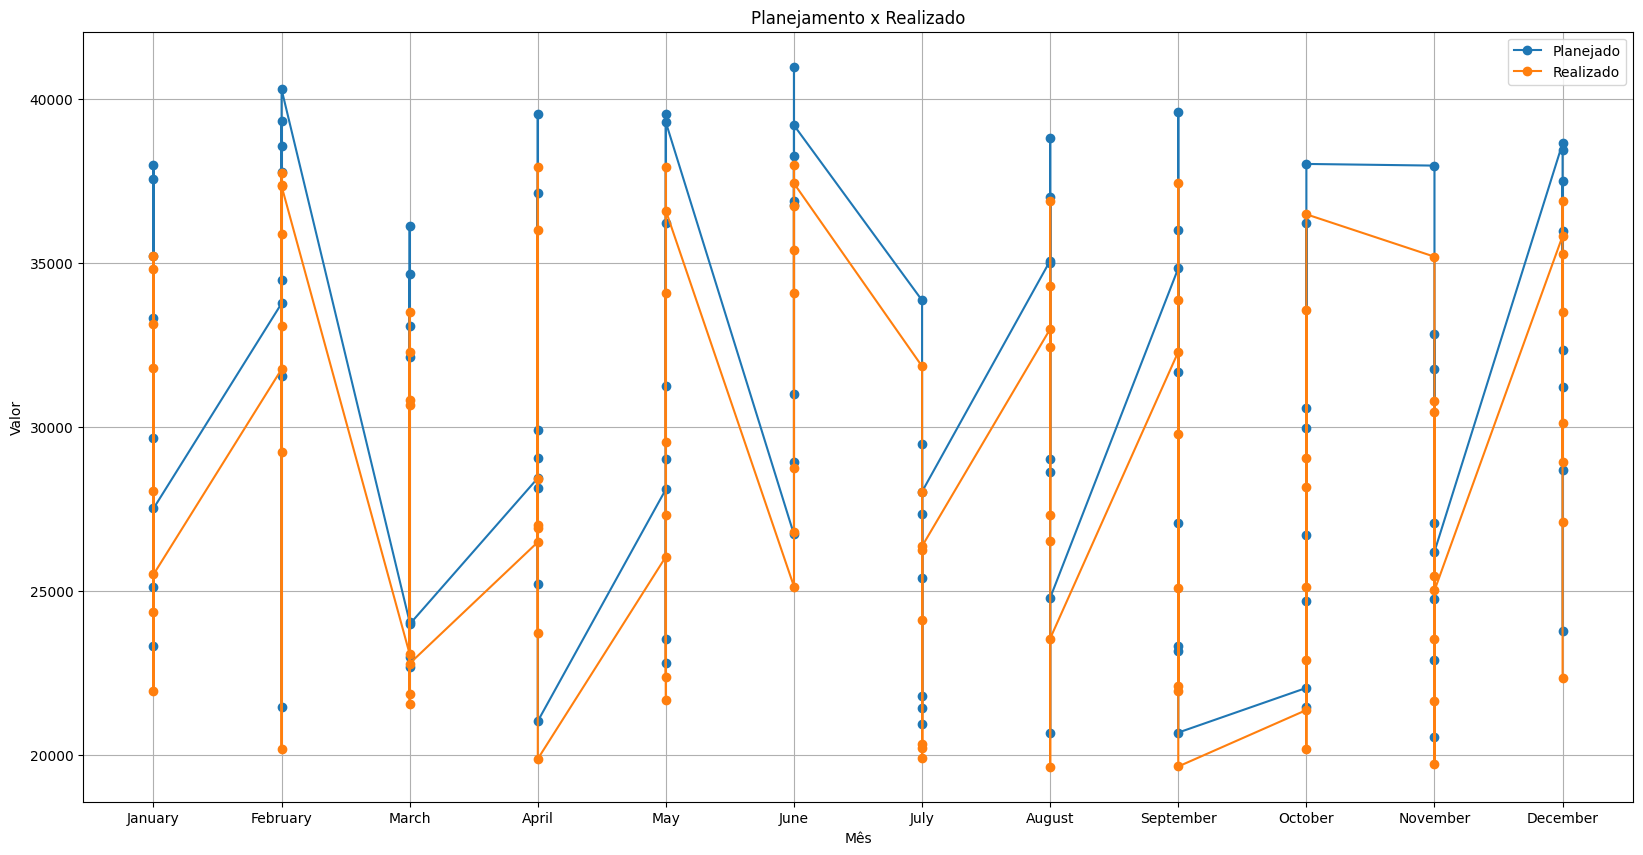

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(dados['Mês'], dados['Planejado'], label='Planejado', marker='o')
plt.plot(dados['Mês'], dados['Realizado'], label='Realizado', marker='o')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Planejamento x Realizado')
plt.legend()
plt.grid(True)
plt.show()

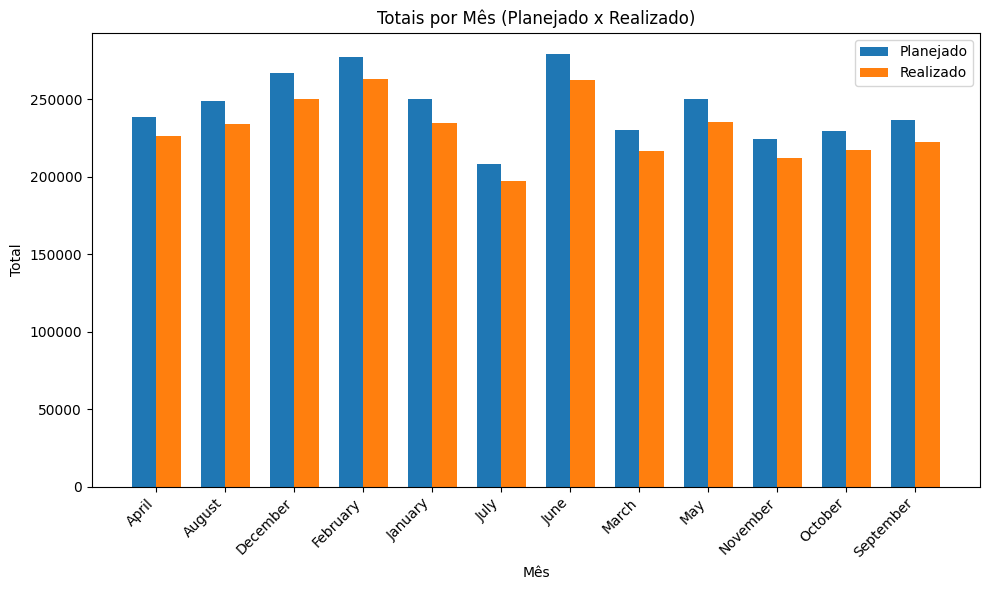

In [ ]:
dados_agrupados = dados.groupby('Mês')[['Planejado', 'Realizado']].sum().reset_index()

plt.figure(figsize=(10, 6))
# Adjust the width and positions for side-by-side bars
width = 0.35  # Width of each bar
x_positions = range(len(dados_agrupados['Mês']))  # X positions for the groups

plt.bar([p - width/2 for p in x_positions], dados_agrupados['Planejado'], label='Planejado', width=width)
plt.bar([p + width/2 for p in x_positions], dados_agrupados['Realizado'], label='Realizado', width=width)

plt.xlabel('Mês')
plt.ylabel('Total')
plt.title('Totais por Mês (Planejado x Realizado)')
plt.xticks(x_positions, dados_agrupados['Mês'], rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os dados
x = dados.iloc[:,0:3].values
y = dados.iloc[:,3].values

x[:,0] = label_encoder.fit_transform(x[:,0])
x[:,1] = label_encoder.fit_transform(x[:,1])
x

array([[4, 5, 35224.76],
       [4, 2, 29674.635],
       [4, 0, 25110.54],
       [4, 1, 37554.975],
       [4, 3, 23318.88],
       [4, 6, 38002.9],
       [4, 4, 33317.575],
       [4, 7, 27514.075],
       [3, 5, 33767.33],
       [3, 2, 39334.68],
       [3, 0, 37788.0],
       [3, 1, 31540.275],
       [3, 3, 38553.2],
       [3, 6, 21466.54],
       [3, 4, 34466.85],
       [3, 7, 40294.8],
       [7, 5, 24044.13],
       [7, 2, 22998.0],
       [7, 0, 36136.375],
       [7, 1, 22693.0],
       [7, 3, 32119.56],
       [7, 6, 33088.025],
       [7, 4, 34657.56],
       [7, 7, 23985.0],
       [0, 5, 28439.64],
       [0, 2, 37143.96],
       [0, 0, 28137.78],
       [0, 1, 25223.74],
       [0, 3, 39528.72],
       [0, 6, 29056.7],
       [0, 4, 29893.0],
       [0, 7, 21026.61],
       [8, 5, 28100.375],
       [8, 2, 23537.0],
       [8, 0, 39528.72],
       [8, 1, 31241.43],
       [8, 3, 36234.76],
       [8, 6, 29029.42],
       [8, 4, 22815.0],
       [8, 7, 39288.36],
   

In [ ]:
# Encode da coluna 'Centro de Custos'
dados = pd.get_dummies(dados, columns=['Centro de Custos'], drop_first=True)

# Dividir os dados em X (features) e y (target)
X = x
y = y

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para avaliar o modelo
def avaliar_modelo(modelo, nome_modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nome_modelo} - MAE: {mae:.2f}, R²: {r2:.2f}")

# Testar diferentes modelos
print("Resultados com Modelos Tradicionais:")

# Testando os modelos de regressão
avaliar_modelo(LinearRegression(), "Regressão Linear")
avaliar_modelo(DecisionTreeRegressor(random_state=42), "Árvore de Decisão")
avaliar_modelo(RandomForestRegressor(random_state=42), "Random Forest")
avaliar_modelo(GradientBoostingRegressor(random_state=42), "Gradient Boosting")


Resultados com Modelos Tradicionais:
Regressão Linear - MAE: 367.23, R²: 0.99
Árvore de Decisão - MAE: 457.05, R²: 0.99
Random Forest - MAE: 420.22, R²: 0.99
Gradient Boosting - MAE: 466.49, R²: 0.99


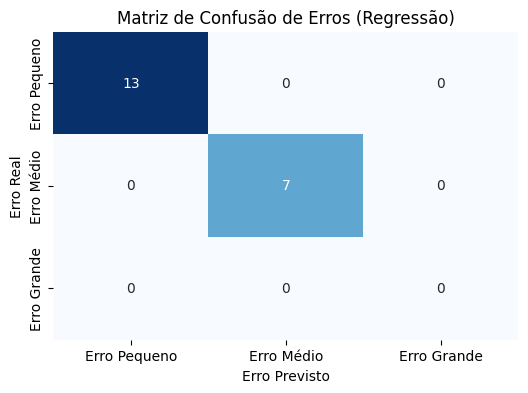

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Função para criar uma matriz de confusão de erros para regressão
def matriz_de_erro(y_real, y_previsto, limiar_pequeno=500, limiar_medio=2000):
    # Calcular os erros absolutos
    erro_absoluto = np.abs(y_real - y_previsto)

    # Discretizar os erros em categorias
    erro_categoria = []
    for erro in erro_absoluto:
        if erro <= limiar_pequeno:
            erro_categoria.append('Erro Pequeno')
        elif erro <= limiar_medio:
            erro_categoria.append('Erro Médio')
        else:
            erro_categoria.append('Erro Grande')

    # Gerar a matriz de confusão, utilizando as categorias de erro
    categories = ['Erro Pequeno', 'Erro Médio', 'Erro Grande']
    matriz = confusion_matrix(erro_categoria, erro_categoria, labels=categories)

    # Criar DataFrame para visualização
    df_matriz = pd.DataFrame(matriz, columns=categories, index=categories)

    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_matriz, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Matriz de Confusão de Erros (Regressão)')
    plt.xlabel('Erro Previsto')
    plt.ylabel('Erro Real')
    plt.show()

# Chamar a função de matriz de erro com os dados reais e previstos
# Certifique-se de que y_test e y_pred estejam no formato adequado
# Por exemplo, após realizar as previsões:
y_pred_rf = RandomForestRegressor(random_state=42).fit(X_train, y_train).predict(X_test)

# Chamar a função de matriz de erro
matriz_de_erro(y_test, y_pred_rf)


Resultados com Modelos Tradicionais:
Regressão Linear - MAE: 367.23, R²: 0.99


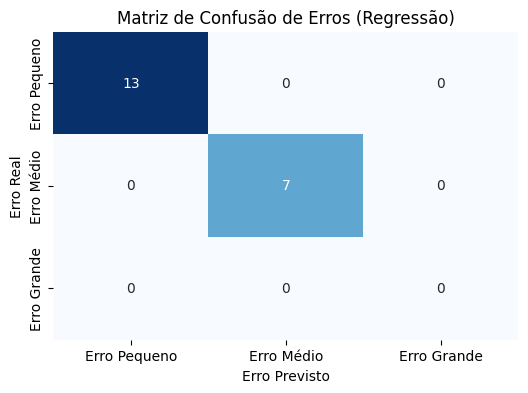

Árvore de Decisão - MAE: 457.05, R²: 0.99


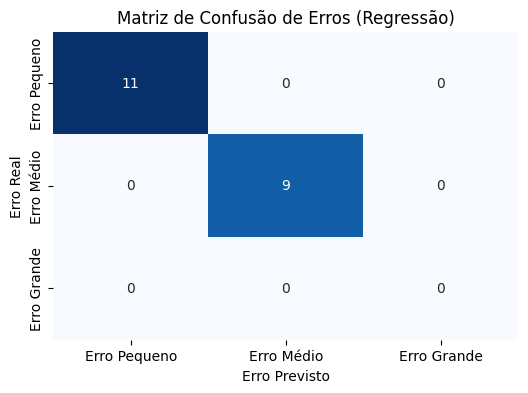

Random Forest - MAE: 420.22, R²: 0.99


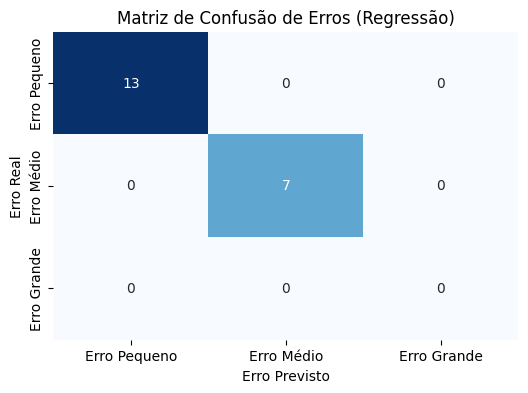

Gradient Boosting - MAE: 466.49, R²: 0.99


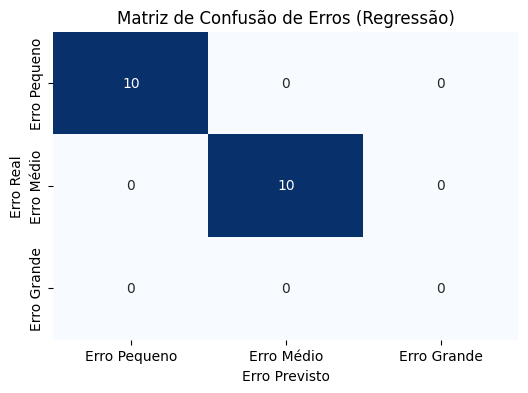

In [ ]:
# Testar diferentes modelos de regressão e gerar matrizes de erro
print("Resultados com Modelos Tradicionais:")

# Regressão Linear
modelo_rl = LinearRegression()
avaliar_modelo(modelo_rl, "Regressão Linear")
y_pred_rl = modelo_rl.predict(X_test)
matriz_de_erro(y_test, y_pred_rl)

# Árvore de Decisão
modelo_ad = DecisionTreeRegressor(random_state=42)
avaliar_modelo(modelo_ad, "Árvore de Decisão")
y_pred_ad = modelo_ad.predict(X_test)
matriz_de_erro(y_test, y_pred_ad)

# Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
avaliar_modelo(modelo_rf, "Random Forest")
y_pred_rf = modelo_rf.predict(X_test)
matriz_de_erro(y_test, y_pred_rf)

# Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
avaliar_modelo(modelo_gb, "Gradient Boosting")
y_pred_gb = modelo_gb.predict(X_test)
matriz_de_erro(y_test, y_pred_gb)


Resultados com Modelos Tradicionais:
Regressão Linear - MAE: 367.23, R²: 0.99


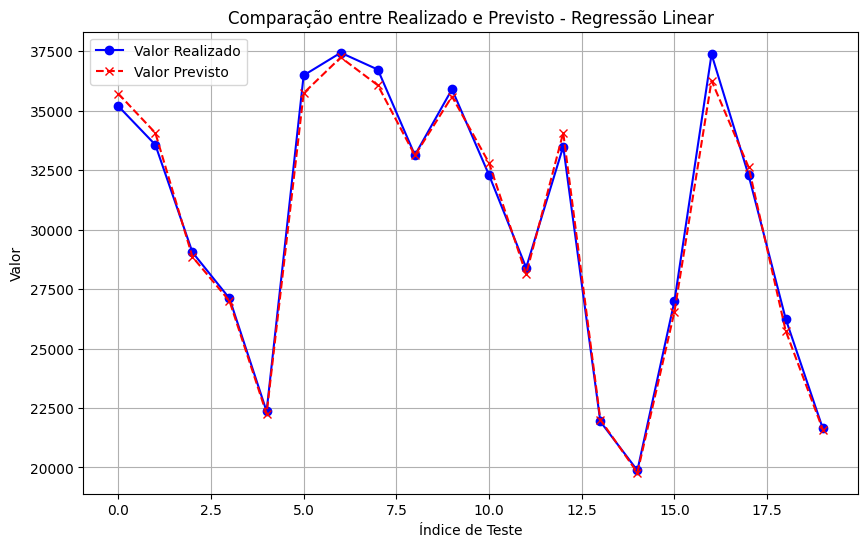

Árvore de Decisão - MAE: 457.05, R²: 0.99


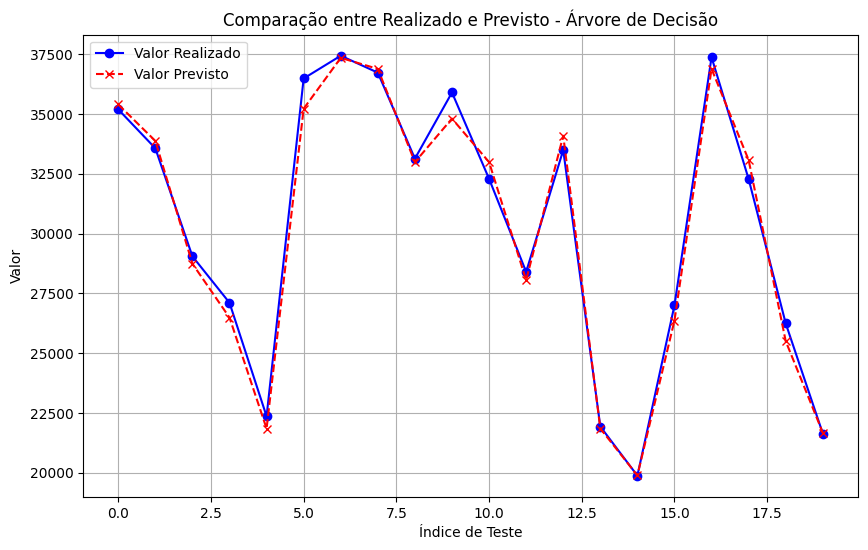

Random Forest - MAE: 420.22, R²: 0.99


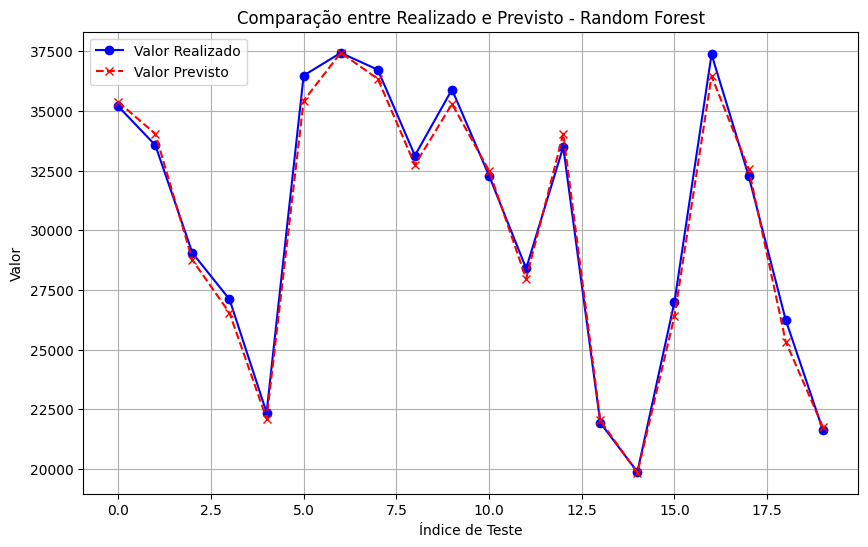

Gradient Boosting - MAE: 466.49, R²: 0.99


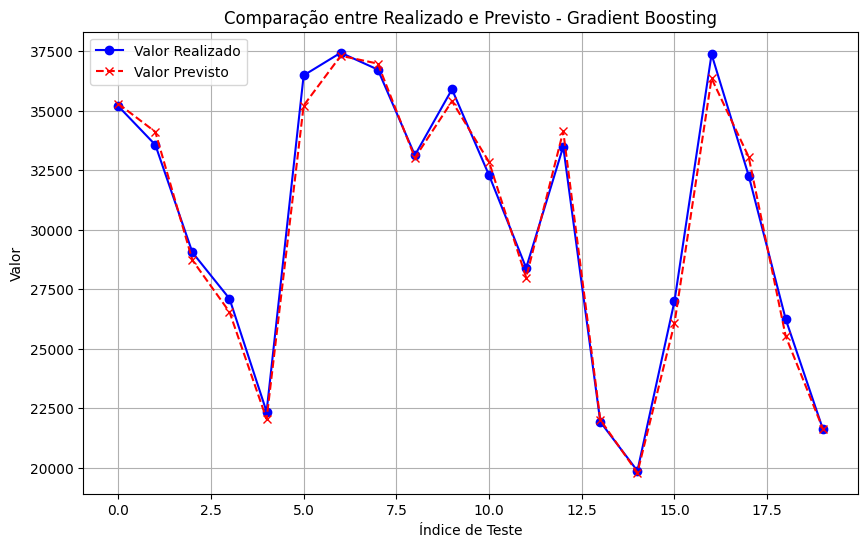

In [ ]:
# Função para avaliar e gerar gráficos para cada modelo
def avaliar_e_gerar_grafico(modelo, nome_modelo):
    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred = modelo.predict(X_test)

    # Cálculo do erro e R²
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nome_modelo} - MAE: {mae:.2f}, R²: {r2:.2f}")

    # Converter y_test para pandas.Series se necessário
    y_test_series = pd.Series(y_test) if isinstance(y_test, np.ndarray) else y_test

    # Gerar gráfico de comparação (valores reais vs previsões)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_series.reset_index(drop=True), label='Valor Realizado', color='blue', linestyle='-', marker='o')
    plt.plot(y_pred, label='Valor Previsto', color='red', linestyle='--', marker='x')
    plt.xlabel('Índice de Teste')
    plt.ylabel('Valor')
    plt.title(f'Comparação entre Realizado e Previsto - {nome_modelo}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Testar diferentes modelos e gerar gráficos
print("Resultados com Modelos Tradicionais:")

# Regressão Linear
avaliar_e_gerar_grafico(LinearRegression(), "Regressão Linear")

# Árvore de Decisão
avaliar_e_gerar_grafico(DecisionTreeRegressor(random_state=42), "Árvore de Decisão")

# Random Forest
avaliar_e_gerar_grafico(RandomForestRegressor(random_state=42), "Random Forest")

# Gradient Boosting
avaliar_e_gerar_grafico(GradientBoostingRegressor(random_state=42), "Gradient Boosting")


In [ ]:
novos_dados = modelo_rl.predict([[0, 4, 30000.1]])
novos_dados

array([28225.12942747])